# Craft a Story From Dataset

This dataset contains a Spotify download of 2,017 songs with 16 characteristsics. Most of the characterists are song attributes like tempo, energy, danceability, etc. The target variable is whether or not a single user liked or disliked a song, represented by a 1 or 0. The goal of this exploration is to observe which song characteristics are predictive of likeability by the user. 

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('/Users/spence/PROGRAMMING/Practice projects/spotify ideas/Spotify guys rating.csv')

In [14]:
df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


A couple of important things to note: 

The 'key' feature is matched to integers starting with C = 1, and going up by semi-tones from there, so C# = 2, etc..

The 'time signature' feature is a representation of how many beats are in each measure. The vast majority of popular songs are in 4/4 time, so '4' will be the most common value here.

The 'mode' feature represents whether the song is major/minor. 0 = minor, 1 = major

The 'valence' feature is a measure of 'song positivity'. A higher score means the song feels happier and more upbeat. A lower score represents a sadder and more mellow vibe. 



In [10]:
df.drop(['Unnamed: 0'],axis=1, inplace=True)

In [12]:
# info on data tapes and null stuff 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

In [13]:
# examining statistical attributes 

df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [43]:
# how many unique values exist for each feature 

df.nunique()

acousticness        1394
danceability         632
duration_ms         1921
energy               719
instrumentalness    1107
key                   12
liveness             793
loudness            1808
mode                   2
speechiness          792
tempo               1919
time_signature         4
valence              853
target                 2
song_title          1956
artist              1343
dtype: int64

In [98]:
# how many song duplicates are there?

song_counts = df['song_title'].value_counts() 
doubles = song_counts[song_counts > 1] 
len(doubles)

59

In [107]:
# lets drop those duplicates 

df.drop_duplicates(subset=['song_title'] , keep='first', inplace=True)

In [110]:
# looking at the top artists by song count 

df.time_signature.value_counts().head(10)

4.0    1832
3.0      92
5.0      31
1.0       1
Name: time_signature, dtype: int64

In [111]:
# how many songs are 'liked' and 'disliked' ?

df.target.value_counts()

1    984
0    972
Name: target, dtype: int64

The dataset is missing no values, which is nice! About half of the songs are liked and half are disliked, providing for a nice even distribution of our target variable. 

# Let's use some data visualization to explore the features of our dataset

<AxesSubplot:>

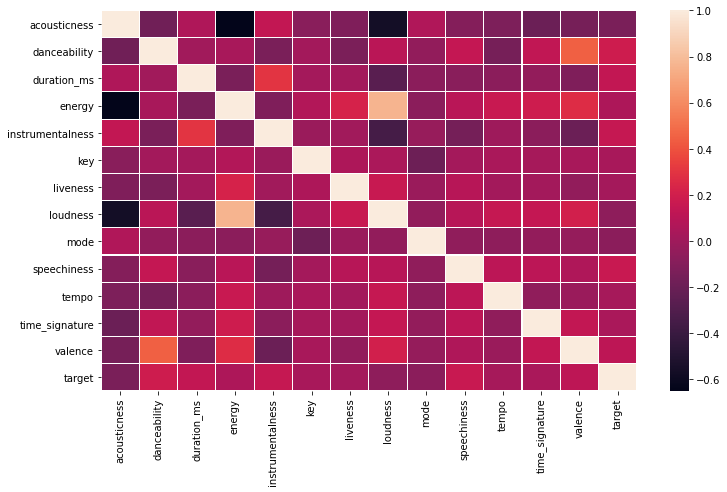

In [112]:
# feature correlation heatmap 

fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(df.corr(), linewidths=.1, ax=ax)

Interpretation of the above chart:

There are some obvious correlations here. 'Energy' is positively correlated with 'loudness' and negatively correlated with 'acousticness'. 'Danceability' is positively correlated with 'valence' and negatively correlated with 'acousticness'. 'Loudness' and 'acousticness'/ 'instrumentalness' are very negatively correlated. This is becuase often times electronic music is made to be very loud, whether it's EDM or Hip-hop it is typically crafted to be played by DJ's in a party setting and thus requires high volume/compression. Acoustic music on the other hand is naturally quieter and more dynamic, it is often times played/recorded by live musicians and thus played back at normal and soft levels. 

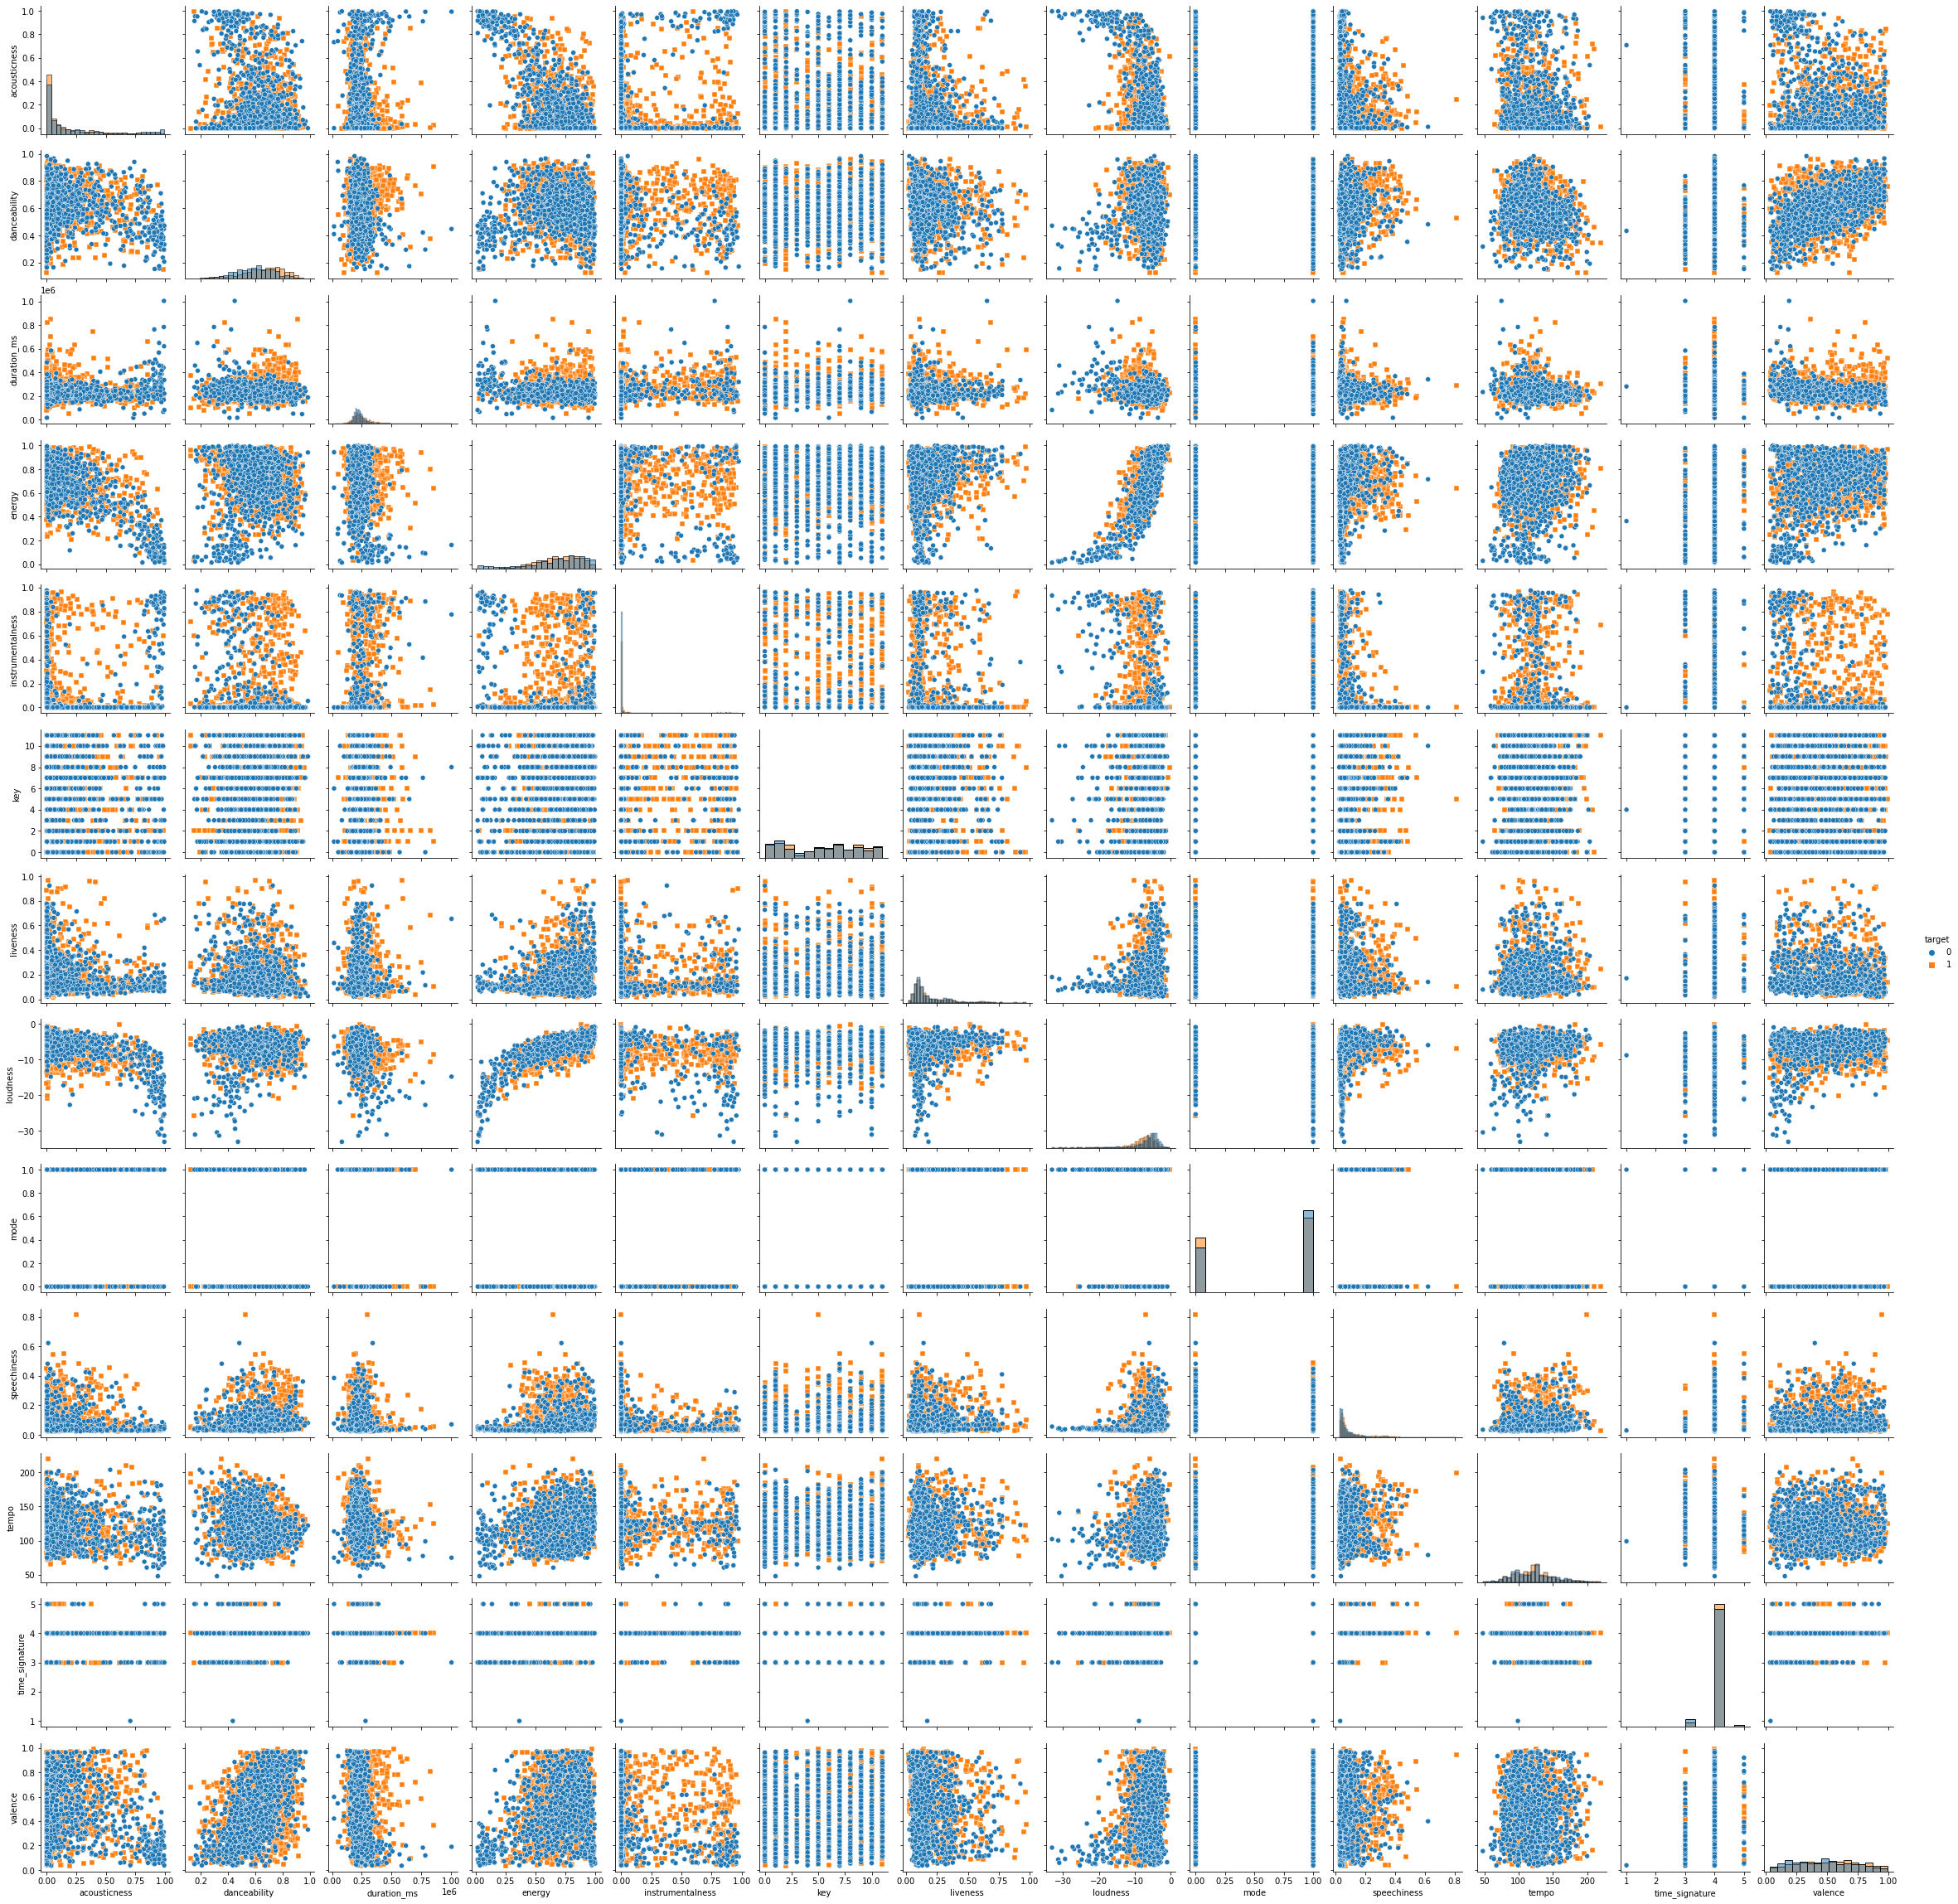

In [129]:
sns.pairplot(df, hue="target", diag_kind="hist", markers=["o", "s"])


From the scatter plots above I can eliminate some variables that seem to have no correlation with our target: 'key', 'mode' 'duration' and 'time signature'. 

Some features that I would like to investigate more are: 'speechiness', 'danceability', 'instrumentalness', 'acousticness', 'loudness', 'energy', 'liveness', and 'valence'.

In [123]:
new_df = df[['speechiness', 'danceability', 'instrumentalness', 'acousticness', 'loudness', 'energy', 'liveness','valence', 'target']]

Now I would like to evaluate these song attributes as they relate to our target. Based on a quick observation of the plots above, I hypothesize that 'spechiness' will be positively correlated to likeability. As well as 'danceability'

<AxesSubplot:xlabel='acousticness', ylabel='Count'>

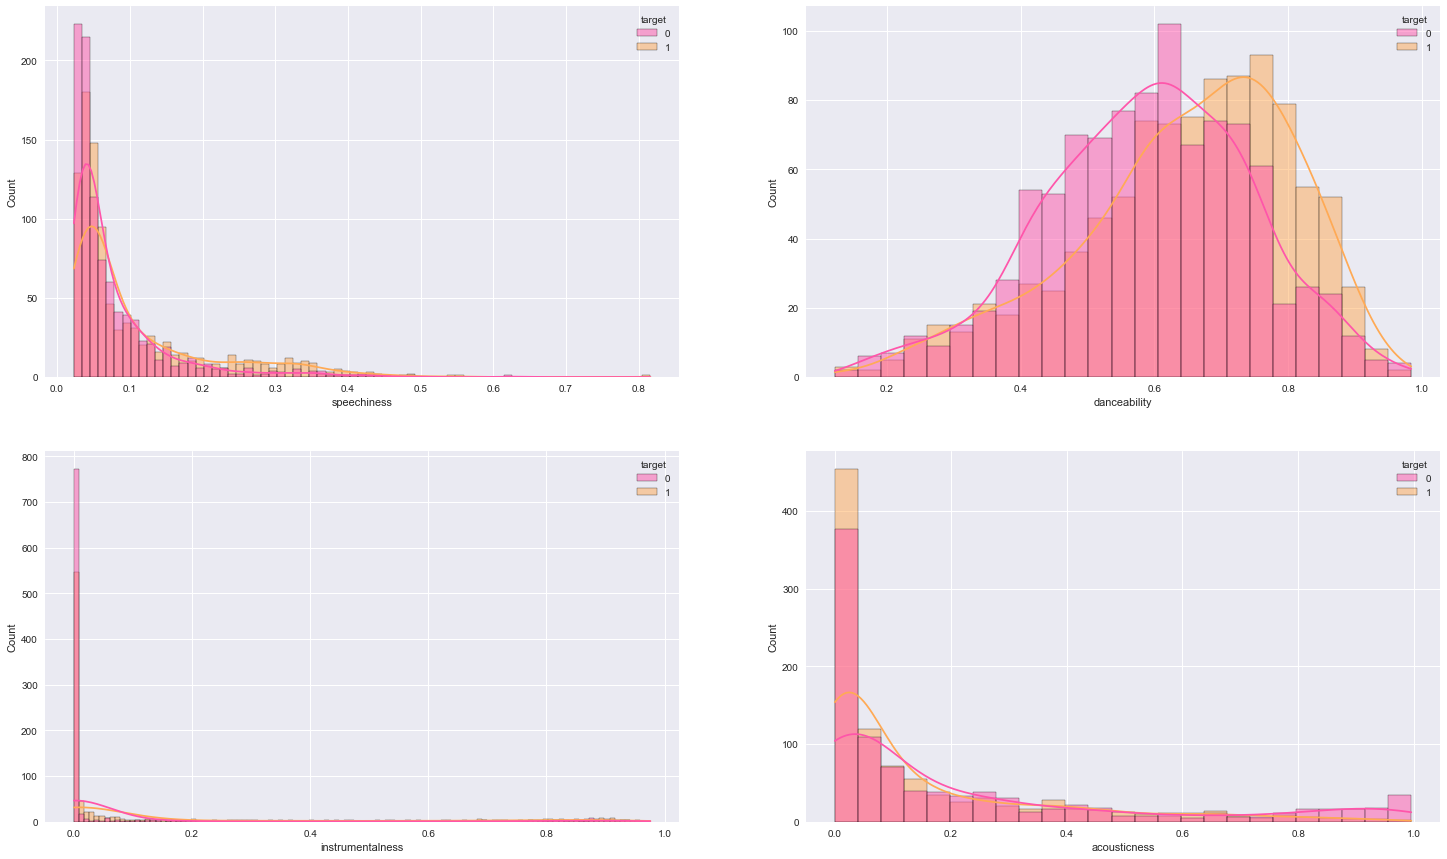

In [156]:
fig, ax =plt.subplots(2,2, figsize=(25,15)) 

sns.histplot(x = new_df['speechiness'], hue = new_df['target'], kde=True, ax=ax[0,0], palette="spring")

sns.histplot(x = new_df['danceability'], hue = new_df['target'], kde= True, ax=ax[0,1], palette="spring")

sns.histplot(x = new_df['instrumentalness'], hue = new_df['target'], kde= True, ax=ax[1,0], palette="spring")

sns.histplot(x = new_df['acousticness'], hue = new_df['target'], kde= True, ax=ax[1,1], palette="spring")

Insights:

There is a clear trend showing that for songs with a higher 'speechiness' and 'danceability' scores, there is a higher count of 'liked' songs.

Most songs scored very low on the 'instrumentalness' metric. However it does appear as though higher 'instrumentalness' score equates to higher 'likeability'.

'Acousticness' appears to have an negative relationship to likeability. For songs with a high 'acousticness' score, the likeability count is lower. 



<AxesSubplot:xlabel='loudness', ylabel='Count'>

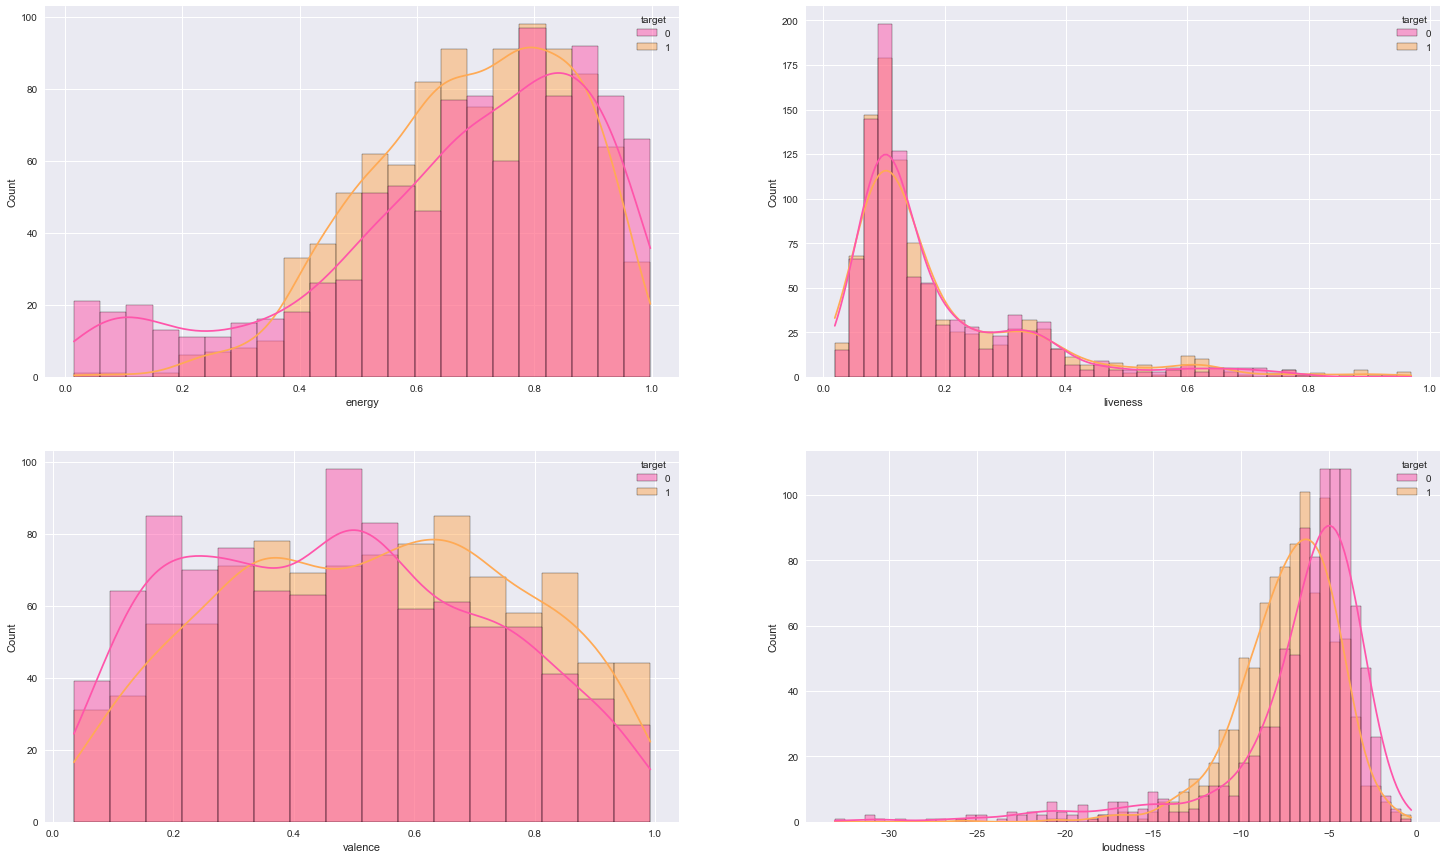

In [155]:
fig, ax =plt.subplots(2,2, figsize=(25,15)) 

sns.histplot(x = new_df['energy'], hue = new_df['target'], kde=True, ax=ax[0,0], palette="spring")

sns.histplot(x = new_df['liveness'], hue = new_df['target'], kde= True, ax=ax[0,1], palette="spring")

sns.histplot(x = new_df['valence'], hue = new_df['target'], kde= True, ax=ax[1,0], palette="spring")

sns.histplot(x = new_df['loudness'], hue = new_df['target'], kde= True, ax=ax[1,1], palette="spring")



Insights:

The 'energy' feature is interesting. There is a middle ground where energy and and likeability are positively correlated. If the energy gets too low or too high, likeability appears to suffer. 

There appears to be no correlation between 'liveness' and likeability.

There is a clear positive correlation between 'valence' and likeability.

There is a clear negative correlation between 'loudness' and likeability. 

# Conclusions

After plotting our features and observing correlations I believe we can draw some safe assumptions. 

The song attributes that predict likeability are: danceability, speechiness, instrumentalness, and valence.

The song attributes that predict unlikeability are: loudness and acousticness.

There are a couple of interesting and peculiar insights in these conlusions. Speechiness and instrumentalness seem as though they are opposties of each other. A song is either more instrumental or more voice oriented. Yet both of these attributes seemed to positively correlate to likeability. A similar insight is true for loudness and acousticness. Songs that are more acoustic tend to be quieter and vice-versa. I would further investigate this insight to check my interpretation of the graphs. A good model would be logistic regression being that our problem at hand is one of binary classification. 